In [1]:
import pandas as pd
data = pd.read_csv("../Assignment1_Rania_115571/Years_Salary.csv")
data.head(5)

,YearsExperience,Salary
0,1.1,4917
1,1.3,5775
2,1.5,4716
3,2.0,5440
4,2.2,4986


In [2]:
#impoer numpy as np

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

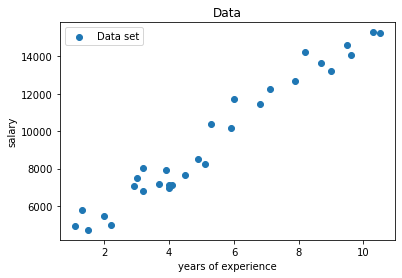

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.title("Data")
plt.xlabel("years of experience")
plt.ylabel("salary")
classes = ["Data set"]
plt.legend(labels=classes)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42)
m = X_train.size
Y_test = Y_test.reshape(X_test.size,1)
Y_train = Y_train.reshape(m,1)

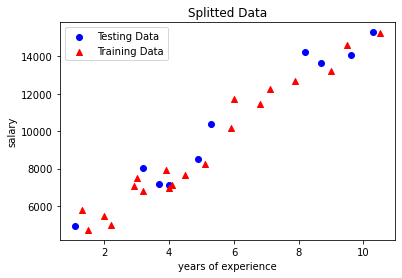

In [5]:
plt.scatter(X_test, Y_test, marker = 'o', color = 'blue')
plt.scatter(X_train, Y_train, marker = '^', color = 'red')

plt.title("Splitted Data")
plt.xlabel("years of experience")
plt.ylabel("salary")

classes = ["Testing Data", "Training Data"]
plt.legend(labels=classes)

plt.show()

In [6]:
import numpy as np
X0 = np.ones_like(X_train)
Xi =np.concatenate((X0,X_train),axis=1)
Xi

array([[ 1. ,  2.2],
       [ 1. ,  5.1],
       [ 1. ,  2.9],
       [ 1. ,  4.1],
       [ 1. ,  4. ],
       [ 1. ,  7.9],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  9. ],
       [ 1. ,  2. ],
       [ 1. ,  7.1],
       [ 1. ,  9.5],
       [ 1. ,  5.9],
       [ 1. , 10.5],
       [ 1. ,  6.8],
       [ 1. ,  3.2],
       [ 1. ,  3.9],
       [ 1. ,  4.5],
       [ 1. ,  6. ],
       [ 1. ,  3. ]])

In [7]:
theta_i = np.ones((2,1))

In [8]:
number_of_iterations = 50
alpha = 0.01

#create a vector as a row
cost_function_values = np.zeros((number_of_iterations))

In [9]:
#gradiant decent 

for x in range(number_of_iterations):
    #matrix multiplication
    h_hat_values = np.dot(Xi,theta_i)
    theta_i = theta_i - alpha*(1/m)* (np.sum(((h_hat_values-Y_train)*Xi),axis=0)).reshape(2,1)
    cost_function_values[x] = (0.5/m) * np.sum(np.square(h_hat_values-Y_train),axis=0)
    

In [10]:
print("value of 𝜃0 =", *theta_i[0] )
print("value of 𝜃1 =", *theta_i[1])
print("ℎ𝜃(𝑥) =",*theta_i[0]," +", *theta_i[1],"* 𝑥")

value of 𝜃0 = 552.6949340219538
value of 𝜃1 = 1586.9422585019302
ℎ𝜃(𝑥) = 552.6949340219538  + 1586.9422585019302 * 𝑥


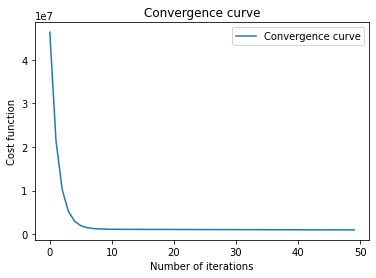

In [11]:
plt.plot(range(number_of_iterations),cost_function_values)
plt.title("Convergence curve")
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
classes = ["Convergence curve"]
plt.legend(labels=classes)
plt.show()

In [12]:
Y_predicit_test = theta_i[0] + theta_i[1] * X_test
Y_predicit_train = theta_i[0] + theta_i[1] * X_train

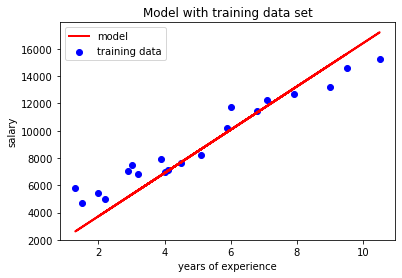

In [13]:
plt.scatter(X_train, Y_train, marker = 'o', color = 'blue')
plt.plot(X_train, Y_predicit_train, linewidth=2, color = 'red')
plt.title("Model with training data set")
plt.xlabel("years of experience")
plt.ylabel("salary")

classes = ["model", "training data"]
plt.legend(labels=classes)
plt.ylim(ymin=2000)
plt.show()

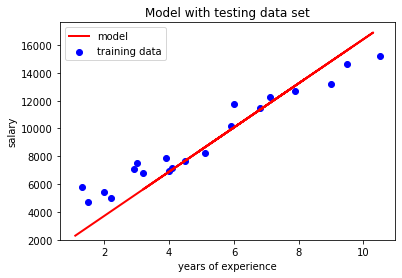

In [14]:
plt.scatter(X_train, Y_train, marker = 'o', color = 'blue')
plt.plot(X_test, Y_predicit_test, linewidth=2, color = 'red')

plt.title("Model with testing data set")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.ylim(ymin=2000)

classes = ["model", "training data"]
plt.legend(labels=classes)

plt.show()